In [1]:
!pip install soccerdata

In [2]:
import soccerdata as sd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import time
import requests

[06/05/25 22:15:29] INFO     No custom team name replacements found. You can configure these in       ]8;id=870382;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=345158;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py#91\91]8;;\
                             /root/soccerdata/config/teamname_replacements.json.                                   

                    INFO     Custom league dict loaded from                                          ]8;id=206522;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py\_config.py]8;;\:]8;id=807820;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_config.py#195\195]8;;\
                             /root/soccerdata/config/league_dict.json.                                             

In [3]:
sd.FBref.available_leagues()

['BRA-Serie A',
 'Big 5 European Leagues Combined',
 'ENG-Premier League',
 'ESP-La Liga',
 'FRA-Ligue 1',
 'GER-Bundesliga',
 'INT-European Championship',
 "INT-Women's World Cup",
 'INT-World Cup',
 'ITA-Serie A']

In [4]:
fbref = sd.FBref(leagues="BRA-Serie A", seasons=2025)
print(fbref.__doc__)

[06/05/25 22:15:34] INFO     Saving cached data to /root/soccerdata/data/FBref                       ]8;id=897919;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_common.py\_common.py]8;;\:]8;id=13124;file:///usr/local/lib/python3.11/dist-packages/soccerdata/_common.py#263\263]8;;\

Provides pd.DataFrames from data at http://fbref.com.

    Data will be downloaded as necessary and cached locally in
    ``~/soccerdata/data/FBref``.

    Parameters
    ----------
    leagues : string or iterable, optional
        IDs of leagues to include. For efficiently reading data from the Top-5
        European leagues, use "Big 5 European Leagues Combined".
    seasons : string, int or list, optional
        Seasons to include. Supports multiple formats.
        Examples: '16-17'; 2016; '2016-17'; [14, 15, 16]
    proxy : 'tor' or dict or list(dict) or callable, optional
        Use a proxy to hide your IP address. Valid options are:
            - "tor": Uses the Tor network. Tor should be running in
              the background on port 9050.
            - dict: A dictionary with the proxy to use. The dict should be
              a mapping of supported protocols to proxy addresses. For example::

                  {
                      'http': 'http://10.10.1.10:3128',
     

In [5]:
player_season_std = fbref.read_player_season_stats(stat_type="standard")
player_season_std.head()

[06/05/25 22:15:41] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=867367;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=747288;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

[06/05/25 22:15:47] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/_common.py:145:     ]8;id=271079;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=879944;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"                   
                               warnings.warn(msg, stacklevel=1)                                                    
                                                                                                                   

nation    pos     age  \
                                                                             
league      season team             player                                   
BRA-Serie A 2526   Atlético Mineiro Alan Franco         ECU     MF  26-288   
                                    Bernard             BRA  FW,MF  32-270   
                                    Brahian Palacios    COL     MF  22-193   
                                    Caio Paulista       BRA     DF  27-025   
                                    Fausto Vera         ARG     MF  25-071   

                                                      born Playing Time  \
                                                                     MP   
league      season team             player                                
BRA-Serie A 2526   Atlético Mineiro Alan Franco       1998            7   
                                    Bernard           1992            9   
                                    Brahian Palacios  2002            1   
                                    Caio Paulista     1998            4   
                                    Fausto Vera       2000            7   

                                                                       \
                                                     Starts  Min  90s   
league      season team             player                              
BRA-Serie A 2526   Atlético Mineiro Alan Franco           7  585  6.5   
                                    Bernard               1  215  2.4   
                                    Brahian Palacios      0    8  0.1   
                                    Caio Paulista         3  208  2.3   
                                    Fausto Vera           5  439  4.9   

                                                     Performance      ...  \
                                                             Gls Ast  ...   
league      season team             player                            ...   
BRA-Serie A 2526   Atlético Mineiro Alan Franco                0   0  ...   
                                    Bernard                    0   0  ...   
                                    Brahian Palacios           0   0  ...   
                                    Caio Paulista              0   0  ...   
                                    Fausto Vera                1   0  ...   

                                                     Per 90 Minutes       \
                                                                Gls  Ast   
league      season team             player                                 
BRA-Serie A 2526   Atlético Mineiro Alan Franco                 0.0  0.0   
                                    Bernard                     0.0  0.0   
                                    Brahian Palacios            0.0  0.0   
                                    Caio Paulista               0.0  0.0   
                                    Fausto Vera                0.21  0.0   

                                                                               \
                                                       G+A  G-PK G+A-PK    xG   
league      season team             player                                      
BRA-Serie A 2526   Atlético Mineiro Alan Franco        0.0   0.0    0.0  0.01   
                                    Bernard            0.0   0.0    0.0  0.02   
                                    Brahian Palacios   0.0   0.0    0.0   0.0   
                                    Caio Paulista      0.0   0.0    0.0  0.15   
                                    Fausto Vera       0.21  0.21   0.21  0.09   

                                                                         \
                                                       xAG xG+xAG  npxG   
league      season team             player                                
BRA-Serie A 2526   Atlético Mineiro Alan Franco        0.0   0.01  0.01   
                                    Bernard           0.18    0.2  

In [6]:
player_season_std = player_season_std.reset_index()
print(player_season_std.columns)
player_season_std.head()

MultiIndex([(        'league',         ''),
            (        'season',         ''),
            (          'team',         ''),
            (        'player',         ''),
            (        'nation',         ''),
            (           'pos',         ''),
            (           'age',         ''),
            (          'born',         ''),
            (  'Playing Time',       'MP'),
            (  'Playing Time',   'Starts'),
            (  'Playing Time',      'Min'),
            (  'Playing Time',      '90s'),
            (   'Performance',      'Gls'),
            (   'Performance',      'Ast'),
            (   'Performance',      'G+A'),
            (   'Performance',     'G-PK'),
            (   'Performance',       'PK'),
            (   'Performance',    'PKatt'),
            (   'Performance',     'CrdY'),
            (   'Performance',     'CrdR'),
            (      'Expected',       'xG'),
            (      'Expected',     'npxG'),
            (      'Expected',  

league season              team            player nation    pos  \
                                                                          
0  BRA-Serie A   2526  Atlético Mineiro       Alan Franco    ECU     MF   
1  BRA-Serie A   2526  Atlético Mineiro           Bernard    BRA  FW,MF   
2  BRA-Serie A   2526  Atlético Mineiro  Brahian Palacios    COL     MF   
3  BRA-Serie A   2526  Atlético Mineiro     Caio Paulista    BRA     DF   
4  BRA-Serie A   2526  Atlético Mineiro       Fausto Vera    ARG     MF   

      age  born Playing Time         ... Per 90 Minutes                   \
                          MP Starts  ...            Gls  Ast   G+A  G-PK   
0  26-288  1998            7      7  ...            0.0  0.0   0.0   0.0   
1  32-270  1992            9      1  ...            0.0  0.0   0.0   0.0   
2  22-193  2002            1      0  ...            0.0  0.0   0.0   0.0   
3  27-025  1998            4      3  ...            0.0  0.0   0.0   0.0   
4  25-071  2000            7      5  ...           0.21  0.0  0.21  0.21   

                                            
  G+A-PK    xG   xAG xG+xAG  npxG npxG+xAG  
0    0.0  0.01   0.0   0.01  0.01     0.01  
1    0.0  0.02  0.18    0.2  0.02      0.2  
2    0.0   0.0   0.0    0.0   0.0      0.0  
3    0.0  0.15  0.04   0.19  0.15     0.19  
4   0.21  0.09  0.03   0.12  0.09     0.12  

[5 rows x 37 columns]

In [7]:
player_season_mis = fbref.read_player_season_stats(stat_type="misc")
player_season_mis.head()

[06/05/25 22:15:54] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=564509;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=214606;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

                    WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/_common.py:145:     ]8;id=433724;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=974519;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"                   
                               warnings.warn(msg, stacklevel=1)                                                    
                                                                                                                   

nation    pos     age  \
                                                                             
league      season team             player                                   
BRA-Serie A 2526   Atlético Mineiro Alan Franco         ECU     MF  26-288   
                                    Bernard             BRA  FW,MF  32-270   
                                    Brahian Palacios    COL     MF  22-193   
                                    Caio Paulista       BRA     DF  27-025   
                                    Fausto Vera         ARG     MF  25-071   

                                                      born  90s Performance  \
                                                                       CrdY   
league      season team             player                                    
BRA-Serie A 2526   Atlético Mineiro Alan Franco       1998  6.5           1   
                                    Bernard           1992  2.4           1   
                                    Brahian Palacios  2002  0.1           0   
                                    Caio Paulista     1998  2.3           1   
                                    Fausto Vera       2000  4.9           1   

                                                                         ...  \
                                                     CrdR 2CrdY Fls Fld  ...   
league      season team             player                               ...   
BRA-Serie A 2526   Atlético Mineiro Alan Franco         0     0   8   3  ...   
                                    Bernard             0     0   5   3  ...   
                                    Brahian Palacios    0     0   0   0  ...   
                                    Caio Paulista       0     0   4   2  ...   
                                    Fausto Vera         0     0   6   3  ...   

                                                                               \
                                                     Crs Int TklW PKwon PKcon   
league      season team             player                                      
BRA-Serie A 2526   Atlético Mineiro Alan Franco        2   2   10     0     0   
                                    Bernard            6   0    3     0     0   
                                    Brahian Palacios   0   0    0     0     0   
                                    Caio Paulista      6   3    4     0     0   
                                    Fausto Vera        2   4    6     0     0   

                                                              Aerial Duels  \
                                                     OG Recov          Won   
league      season team             player                                   
BRA-Serie A 2526   Atlético Mineiro Alan Franco       0    21            8   
                                    Bernard           0    13            1   
                                    Brahian Palacios  0     1            0   
                                    Caio Paulista     0    10            3   
                                    Fausto Vera       0    19            3   

                                                                  
                                                     Lost   Won%  
league      season team             player                        
BRA-Serie A 2526   Atlético Mineiro Alan Franco         1   88.9  
                                    Bernard             0  100.0  
                                    Brahian Palacios    0   <NA>  
                                    Caio Paulista       1   75.0  
                                    Fausto Vera         5   37.5  

[5 rows x 21 columns]

In [8]:
player_season_mis = player_season_mis.reset_index()
print(player_season_mis.columns)
player_season_mis.head()

MultiIndex([(      'league',      ''),
            (      'season',      ''),
            (        'team',      ''),
            (      'player',      ''),
            (      'nation',      ''),
            (         'pos',      ''),
            (         'age',      ''),
            (        'born',      ''),
            (         '90s',      ''),
            ( 'Performance',  'CrdY'),
            ( 'Performance',  'CrdR'),
            ( 'Performance', '2CrdY'),
            ( 'Performance',   'Fls'),
            ( 'Performance',   'Fld'),
            ( 'Performance',   'Off'),
            ( 'Performance',   'Crs'),
            ( 'Performance',   'Int'),
            ( 'Performance',  'TklW'),
            ( 'Performance', 'PKwon'),
            ( 'Performance', 'PKcon'),
            ( 'Performance',    'OG'),
            ( 'Performance', 'Recov'),
            ('Aerial Duels',   'Won'),
            ('Aerial Duels',  'Lost'),
            ('Aerial Duels',  'Won%')],
           )


league season              team            player nation    pos  \
                                                                          
0  BRA-Serie A   2526  Atlético Mineiro       Alan Franco    ECU     MF   
1  BRA-Serie A   2526  Atlético Mineiro           Bernard    BRA  FW,MF   
2  BRA-Serie A   2526  Atlético Mineiro  Brahian Palacios    COL     MF   
3  BRA-Serie A   2526  Atlético Mineiro     Caio Paulista    BRA     DF   
4  BRA-Serie A   2526  Atlético Mineiro       Fausto Vera    ARG     MF   

      age  born  90s Performance  ...                                    \
                            CrdY  ... Crs Int TklW PKwon PKcon OG Recov   
0  26-288  1998  6.5           1  ...   2   2   10     0     0  0    21   
1  32-270  1992  2.4           1  ...   6   0    3     0     0  0    13   
2  22-193  2002  0.1           0  ...   0   0    0     0     0  0     1   
3  27-025  1998  2.3           1  ...   6   3    4     0     0  0    10   
4  25-071  2000  4.9           1  ...   2   4    6     0     0  0    19   

  Aerial Duels              
           Won Lost   Won%  
0            8    1   88.9  
1            1    0  100.0  
2            0    0   <NA>  
3            3    1   75.0  
4            3    5   37.5  

[5 rows x 25 columns]

In [9]:
player_season_def = fbref.read_player_season_stats(stat_type="defense")
player_season_def.head()

[06/05/25 22:16:01] WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/fbref.py:165:       ]8;id=44805;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=314255;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             FutureWarning: The behavior of DataFrame concatenation with empty or                  
                             all-NA entries is deprecated. In a future version, this will no longer                
                             exclude empty or all-NA columns when determining the result dtypes. To                
                             retain the old behavior, exclude the relevant entries before the                      
                             concat operation.                                                                     
                               pd.concat(dfs)                                                                      
                                                                                                                   

                    WARNING  /usr/local/lib/python3.11/dist-packages/soccerdata/_common.py:145:     ]8;id=836553;file:///usr/lib/python3.11/warnings.py\warnings.py]8;;\:]8;id=587445;file:///usr/lib/python3.11/warnings.py#110\110]8;;\
                             UserWarning: Season id "2021" is ambiguous: interpreting as "20-21"                   
                               warnings.warn(msg, stacklevel=1)                                                    
                                                                                                                   

nation    pos     age  \
                                                                             
league      season team             player                                   
BRA-Serie A 2526   Atlético Mineiro Alan Franco         ECU     MF  26-288   
                                    Bernard             BRA  FW,MF  32-270   
                                    Brahian Palacios    COL     MF  22-193   
                                    Caio Paulista       BRA     DF  27-025   
                                    Fausto Vera         ARG     MF  25-071   

                                                      born  90s Tackles       \
                                                                    Tkl TklW   
league      season team             player                                     
BRA-Serie A 2526   Atlético Mineiro Alan Franco       1998  6.5      13   10   
                                    Bernard           1992  2.4       5    3   
                                    Brahian Palacios  2002  0.1       0    0   
                                    Caio Paulista     1998  2.3       9    4   
                                    Fausto Vera       2000  4.9       9    6   

                                                                              \
                                                     Def 3rd Mid 3rd Att 3rd   
league      season team             player                                     
BRA-Serie A 2526   Atlético Mineiro Alan Franco            5       4       4   
                                    Bernard                1       3       1   
                                    Brahian Palacios       0       0       0   
                                    Caio Paulista          4       2       3   
                                    Fausto Vera            3       6       0   

                                                      ... Challenges         \
                                                      ...        Att   Tkl%   
league      season team             player            ...                     
BRA-Serie A 2526   Atlético Mineiro Alan Franco       ...          7  100.0   
                                    Bernard           ...          5   60.0   
                                    Brahian Palacios  ...          0   <NA>   
                                    Caio Paulista     ...          7   85.7   
                                    Fausto Vera       ...         12   50.0   

                                                          Blocks         Int  \
                                                     Lost Blocks Sh Pass       
league      season team             player                                     
BRA-Serie A 2526   Atlético Mineiro Alan Franco         0      2  0    2   2   
                                    Bernard             2      2  0    2   0   
                                    Brahian Palacios    0      0  0    0   0   
                                    Caio Paulista       1      3  2    1   3   
                                    Fausto Vera         6      4  2    2   4   

                                                     Tkl+Int Clr Err  
                                                                      
league      season team             player                            
BRA-Serie A 2526   Atlético Mineiro Alan Franco           15   9   0  
                                    Bernard                5   1   0  
                                    Brahian Palacios       0   0   0  
                                    Caio Paulista         12   9   0  
                                    Fausto Vera           13   8   0  

[5 rows x 21 columns]

In [10]:
player_season_def = player_season_def.reset_index()
print(player_season_def.columns)
player_season_def.head()

MultiIndex([(    'league',        ''),
            (    'season',        ''),
            (      'team',        ''),
            (    'player',        ''),
            (    'nation',        ''),
            (       'pos',        ''),
            (       'age',        ''),
            (      'born',        ''),
            (       '90s',        ''),
            (   'Tackles',     'Tkl'),
            (   'Tackles',    'TklW'),
            (   'Tackles', 'Def 3rd'),
            (   'Tackles', 'Mid 3rd'),
            (   'Tackles', 'Att 3rd'),
            ('Challenges',     'Tkl'),
            ('Challenges',     'Att'),
            ('Challenges',    'Tkl%'),
            ('Challenges',    'Lost'),
            (    'Blocks',  'Blocks'),
            (    'Blocks',      'Sh'),
            (    'Blocks',    'Pass'),
            (       'Int',        ''),
            (   'Tkl+Int',        ''),
            (       'Clr',        ''),
            (       'Err',        '')],
           )


league season              team            player nation    pos  \
                                                                          
0  BRA-Serie A   2526  Atlético Mineiro       Alan Franco    ECU     MF   
1  BRA-Serie A   2526  Atlético Mineiro           Bernard    BRA  FW,MF   
2  BRA-Serie A   2526  Atlético Mineiro  Brahian Palacios    COL     MF   
3  BRA-Serie A   2526  Atlético Mineiro     Caio Paulista    BRA     DF   
4  BRA-Serie A   2526  Atlético Mineiro       Fausto Vera    ARG     MF   

      age  born  90s Tackles  ... Challenges             Blocks         Int  \
                         Tkl  ...        Att   Tkl% Lost Blocks Sh Pass       
0  26-288  1998  6.5      13  ...          7  100.0    0      2  0    2   2   
1  32-270  1992  2.4       5  ...          5   60.0    2      2  0    2   0   
2  22-193  2002  0.1       0  ...          0   <NA>    0      0  0    0   0   
3  27-025  1998  2.3       9  ...          7   85.7    1      3  2    1   3   
4  25-071  2000  4.9       9  ...         12   50.0    6      4  2    2   4   

  Tkl+Int Clr Err  
                   
0      15   9   0  
1       5   1   0  
2       0   0   0  
3      12   9   0  
4      13   8   0  

[5 rows x 25 columns]

In [11]:
# 1. Achatar o MultiIndex para facilitar a manipulação
player_season_std.columns = ['_'.join(col).strip() for col in player_season_std.columns]
player_season_mis.columns = ['_'.join(col).strip() for col in player_season_mis.columns]
player_season_def.columns = ['_'.join(col).strip() for col in player_season_def.columns]

# 2. Verificar os novos nomes das colunas
print(player_season_std.columns)
print(player_season_mis.columns)
print(player_season_def.columns)

Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', 'Playing Time_MP', 'Playing Time_Starts', 'Playing Time_Min',
       'Playing Time_90s', 'Performance_Gls', 'Performance_Ast',
       'Performance_G+A', 'Performance_G-PK', 'Performance_PK',
       'Performance_PKatt', 'Performance_CrdY', 'Performance_CrdR',
       'Expected_xG', 'Expected_npxG', 'Expected_xAG', 'Expected_npxG+xAG',
       'Progression_PrgC', 'Progression_PrgP', 'Progression_PrgR',
       'Per 90 Minutes_Gls', 'Per 90 Minutes_Ast', 'Per 90 Minutes_G+A',
       'Per 90 Minutes_G-PK', 'Per 90 Minutes_G+A-PK', 'Per 90 Minutes_xG',
       'Per 90 Minutes_xAG', 'Per 90 Minutes_xG+xAG', 'Per 90 Minutes_npxG',
       'Per 90 Minutes_npxG+xAG'],
      dtype='object')
Index(['league_', 'season_', 'team_', 'player_', 'nation_', 'pos_', 'age_',
       'born_', '90s_', 'Performance_CrdY', 'Performance_CrdR',
       'Performance_2CrdY', 'Performance_Fls', 'Performance_Fld',
       'Performan

In [12]:

# 3. Selecionar as colunas desejadas de cada DataFrame
df_std_selected = player_season_std[
    ['player_', 'team_','pos_','age_','Playing Time_Min','Progression_PrgC', 'Progression_PrgP',]
]
df_mis_selected = player_season_mis[
    ['player_', 'team_','Performance_CrdY','Performance_CrdR', 'Performance_2CrdY', 'Performance_Fls','Performance_Int','Performance_Recov','Aerial Duels_Won', 'Aerial Duels_Lost', 'Aerial Duels_Won%']
]
df_def_selected = player_season_def[
    ['player_', 'team_','Tackles_Tkl', 'Tackles_TklW','Clr_', 'Err_',]
]

# 4. Realizar o merge dos três DataFrames com base nas colunas 'player_' e 'team_'
df_merged_1 = pd.merge(df_std_selected, df_mis_selected, on=['player_', 'team_'], how='inner')
df_merged= pd.merge(df_merged_1, df_def_selected, on=['player_', 'team_'], how='inner')
# 5. Exibir o resultado
print(df_merged.head())
print(f"Número de linhas: {len(df_merged)}")

            player_             team_   pos_    age_  Playing Time_Min  \
0       Alan Franco  Atlético Mineiro     MF  26-288               585   
1           Bernard  Atlético Mineiro  FW,MF  32-270               215   
2  Brahian Palacios  Atlético Mineiro     MF  22-193                 8   
3     Caio Paulista  Atlético Mineiro     DF  27-025               208   
4       Fausto Vera  Atlético Mineiro     MF  25-071               439   

   Progression_PrgC  Progression_PrgP  Performance_CrdY  Performance_CrdR  \
0                 2                22                 1                 0   
1                11                23                 1                 0   
2                 0                 0                 0                 0   
3                 6                17                 1                 0   
4                 5                22                 1                 0   

   Performance_2CrdY  Performance_Fls  Performance_Int  Performance_Recov  \
0              

In [13]:
# Filtrar jogadores com pelo menos 600 minutos jogados
filtered_data = df_merged[df_merged[('Playing Time_Min')] >= 600]

# Filtrar para remover goleiros (GK), Defesas(DF) e Meias (MF)
filtered_data = filtered_data[
    ~filtered_data[('pos_')].str.contains('GK|DF|FW', na=False)
]

# Exibir as primeiras linhas para confirmar a filtragem

print(filtered_data.head())
print(f"Número de linhas: {len(filtered_data)}")

           player_          team_ pos_    age_  Playing Time_Min  \
26  Caio Alexandre          Bahia   MF  26-101               651   
36      Jean Lucas          Bahia   MF  26-348               622   
62         Gregore  Botafogo (RJ)   MF  31-095               863   
69  Marlon Freitas  Botafogo (RJ)   MF  30-070               928   
83       Dieguinho          Ceará   MF  29-217               967   

    Progression_PrgC  Progression_PrgP  Performance_CrdY  Performance_CrdR  \
26                 5                47                 4                 0   
36                16                22                 1                 1   
62                 7                60                 3                 0   
69                 7                74                 2                 0   
83                 5                28                 1                 0   

    Performance_2CrdY  Performance_Fls  Performance_Int  Performance_Recov  \
26                  0               20      

In [14]:
# Selecionar as colunas desejadas para análise
Vol = filtered_data[[
    ('player_'),
    ('team_'),
    ('pos_'),
    ('age_'),
    ('Playing Time_Min'),
    ('Progression_PrgC'),
    ('Progression_PrgP'),
    ('Performance_CrdY'),
    ('Performance_CrdR'),
    ('Performance_2CrdY'),
    ('Performance_Fls'),
    ('Performance_Int'),
    ('Performance_Recov'),
    ('Aerial Duels_Won'),
    ('Aerial Duels_Lost'),
    ('Aerial Duels_Won%'),
    ('Tackles_Tkl'),
    ('Tackles_TklW'),
    ('Clr_'),
    ('Err_'),
]]

# Renomear as colunas para facilitar o uso
Vol.columns = ['jogador','time','posicao','idade', 'Minutos','Prgc','PrgP','Amarelo','Vermelho','2 Amarelo','Falta Cometida','interceptacao','recuperacoes','Duelos Aereoes W','Duelos Aereoes L','Duelos Aereoes W%', 'Divididas Total','Divididas Ganhas','Clearence','Erros',]

# Exportar o dataframe para um arquivo CSV
Vol.to_csv('Vol_data.csv', index=False, encoding='utf-8-sig')

# Exibir as primeiras linhas para confirmar a seleção de colunas
print(Vol.head())

# Remover jogadores com todas as métricas iguais a 0
#Vol = Vol[(Vol[['Prgc', 'PrgP', 'Aerial Duel%','Aerial Duel Won','Aerial Duel Lost', 'Fouls','Desarmes Totais','Desarmes%','Interceptacao','Desarmes Certos','Cross',]] != 0).any(axis=1)]



           jogador           time posicao   idade  Minutos  Prgc  PrgP  \
26  Caio Alexandre          Bahia      MF  26-101      651     5    47   
36      Jean Lucas          Bahia      MF  26-348      622    16    22   
62         Gregore  Botafogo (RJ)      MF  31-095      863     7    60   
69  Marlon Freitas  Botafogo (RJ)      MF  30-070      928     7    74   
83       Dieguinho          Ceará      MF  29-217      967     5    28   

    Amarelo  Vermelho  2 Amarelo  Falta Cometida  interceptacao  recuperacoes  \
26        4         0          0              20              8            37   
36        1         1          0               9              4            28   
62        3         0          0              41             12            51   
69        2         0          0               8              7            32   
83        1         0          0               5             15            57   

    Duelos Aereoes W  Duelos Aereoes L  Duelos Aereoes W%  Divididas

### **2. Criar modelos de classificação para  (Volantes)**

In [15]:
# Padronizar os dados para clusterização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Vol[['Prgc','PrgP','Amarelo','Vermelho','2 Amarelo','Falta Cometida','interceptacao','recuperacoes','Duelos Aereoes W','Duelos Aereoes L','Duelos Aereoes W%', 'Divididas Total','Divididas Ganhas','Clearence','Erros']])

# Definir e ajustar o modelo K-Means
kmeans = KMeans(n_clusters=5, init='random', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adicionar os clusters ao DataFrame
Vol['Cluster'] = clusters

# Exibir os jogadores com seus clusters
print(Vol[['Prgc','PrgP','Amarelo','Vermelho','2 Amarelo','Falta Cometida','interceptacao','recuperacoes','Duelos Aereoes W','Duelos Aereoes L','Duelos Aereoes W%', 'Divididas Total','Divididas Ganhas','Clearence','Erros']])

     Prgc  PrgP  Amarelo  Vermelho  2 Amarelo  Falta Cometida  interceptacao  \
26      5    47        4         0          0              20              8   
36     16    22        1         1          0               9              4   
62      7    60        3         0          0              41             12   
69      7    74        2         0          0               8              7   
83      5    28        1         0          0               5             15   
88      3    34        3         0          0              14              8   
94      6    27        2         0          0              17              3   
105    16    42        0         0          0              12              8   
107    13    52        2         0          0              19              5   
127     5    23        2         0          0              11              9   
147     4    41        3         0          0              12             10   
148    11    53        1         0      

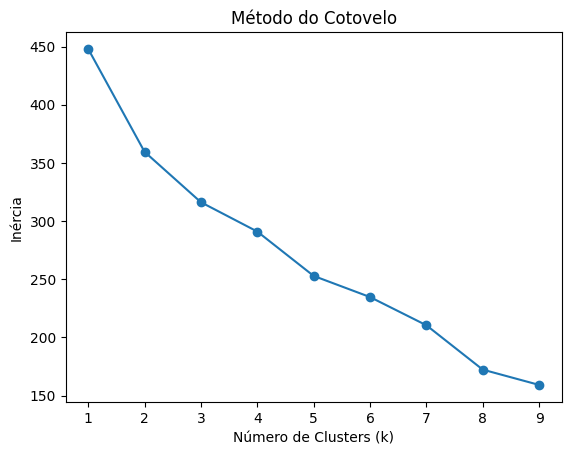

In [16]:
#Avaliar o Número de Clusters
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

In [17]:
# Verificar se há algum NaN em X_scaled
tem_nan = np.isnan(X_scaled).any()

if tem_nan:
    print("X_scaled contém NaNs.")
else:
    print("X_scaled não contém NaNs.")

# Para ver a quantidade de NaNs por coluna:
nans_por_coluna = np.isnan(X_scaled).sum(axis=0)
print("Número de NaNs por coluna:", nans_por_coluna)

# Para ver a quantidade total de NaNs:
total_nans = np.isnan(X_scaled).sum()
print("Número total de NaNs:", total_nans)

X_scaled não contém NaNs.
Número de NaNs por coluna: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Número total de NaNs: 0


In [18]:
# Calcular as médias de cada cluster apenas para colunas numéricas
cluster_summary = Vol.groupby('Cluster').agg({col: 'mean' for col in Vol.select_dtypes(include=['number']).columns})
print(cluster_summary)

            Minutos       Prgc       PrgP   Amarelo  Vermelho  2 Amarelo  \
Cluster                                                                    
0        685.571429  14.714286  42.428571  1.142857       0.0        0.0   
1             633.5       19.0       23.0       2.0       1.0        0.0   
2        705.636364   4.727273  36.454545  1.636364       0.0        0.0   
3        757.111111   5.888889       36.0  3.111111       0.0        0.0   
4        856.333333   6.666667       38.0  2.666667       0.0        0.0   

         Falta Cometida  interceptacao  recuperacoes  Duelos Aereoes W  \
Cluster                                                                  
0             13.142857       4.142857     37.428571          2.571429   
1                   9.0            6.0          27.0               6.5   
2             11.545455       9.181818     34.363636          7.272727   
3             16.666667       8.555556     44.666667          4.555556   
4                  22.0

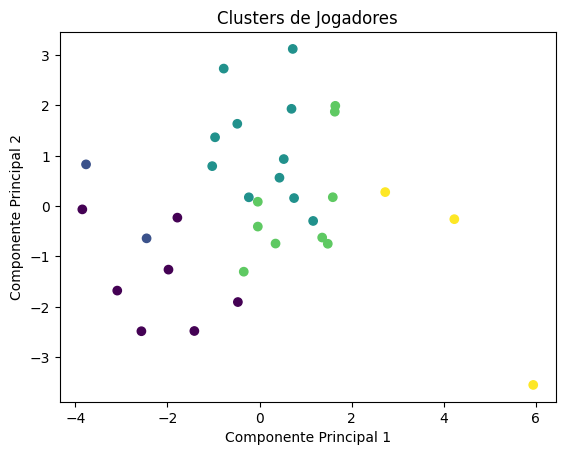

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters de Jogadores')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


In [20]:
# Selecionar apenas as colunas numéricas para calcular a correlação
numeric_columns = Vol.select_dtypes(include=np.number).columns
correlation_matrix = Vol[numeric_columns].corr()

# Exibir a matriz de correlação
print(correlation_matrix)

                    Minutos      Prgc      PrgP   Amarelo  Vermelho  \
Minutos            1.000000 -0.136658  0.521594  0.045530 -0.223130   
Prgc              -0.136658  1.000000  0.038834 -0.354099  0.509450   
PrgP               0.521594  0.038834  1.000000 -0.011697 -0.286240   
Amarelo            0.045530 -0.354099 -0.011697  1.000000 -0.012926   
Vermelho          -0.223130  0.509450 -0.286240 -0.012926  1.000000   
2 Amarelo               NaN       NaN       NaN       NaN       NaN   
Falta Cometida     0.096159 -0.209909  0.271172  0.458844 -0.203902   
interceptacao      0.278306 -0.589835 -0.147380  0.344610 -0.157427   
recuperacoes       0.525138 -0.236690  0.203345  0.243619 -0.323661   
Duelos Aereoes W   0.212009 -0.323275 -0.116732  0.028172  0.039626   
Duelos Aereoes L   0.358542  0.118903  0.079034 -0.036544  0.085671   
Duelos Aereoes W%  0.028548 -0.435875 -0.150245  0.148102  0.025811   
Divididas Total    0.374784 -0.341960  0.037472  0.128042 -0.255036   
Dividi

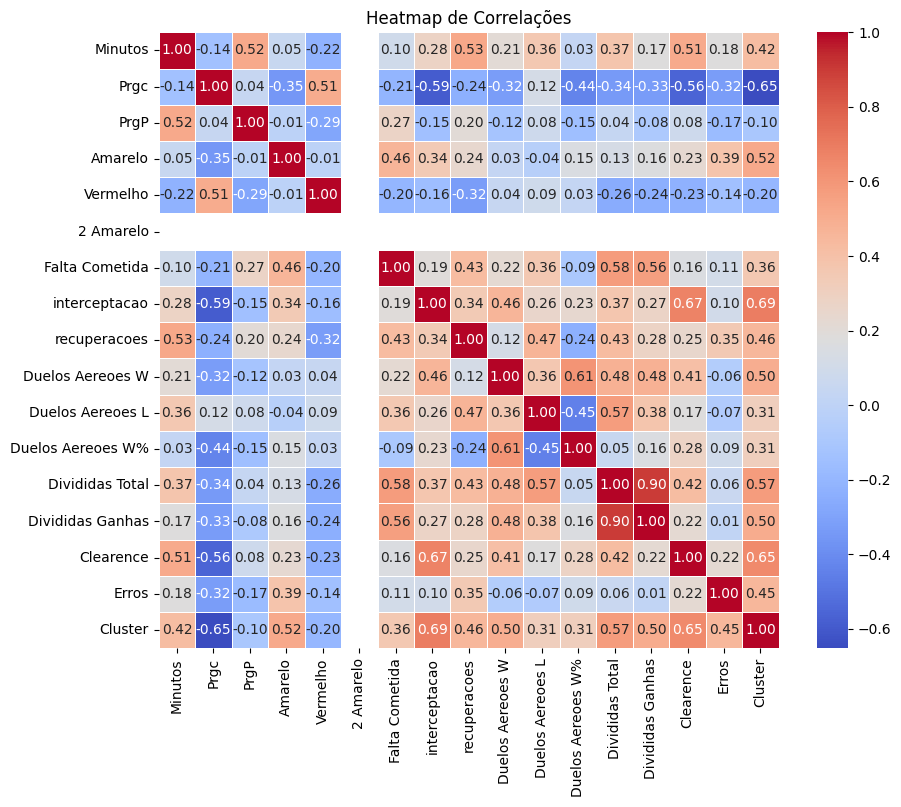

In [21]:
plt.figure(figsize=(10, 8))  # Define o tamanho da figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap de Correlações')
plt.show()


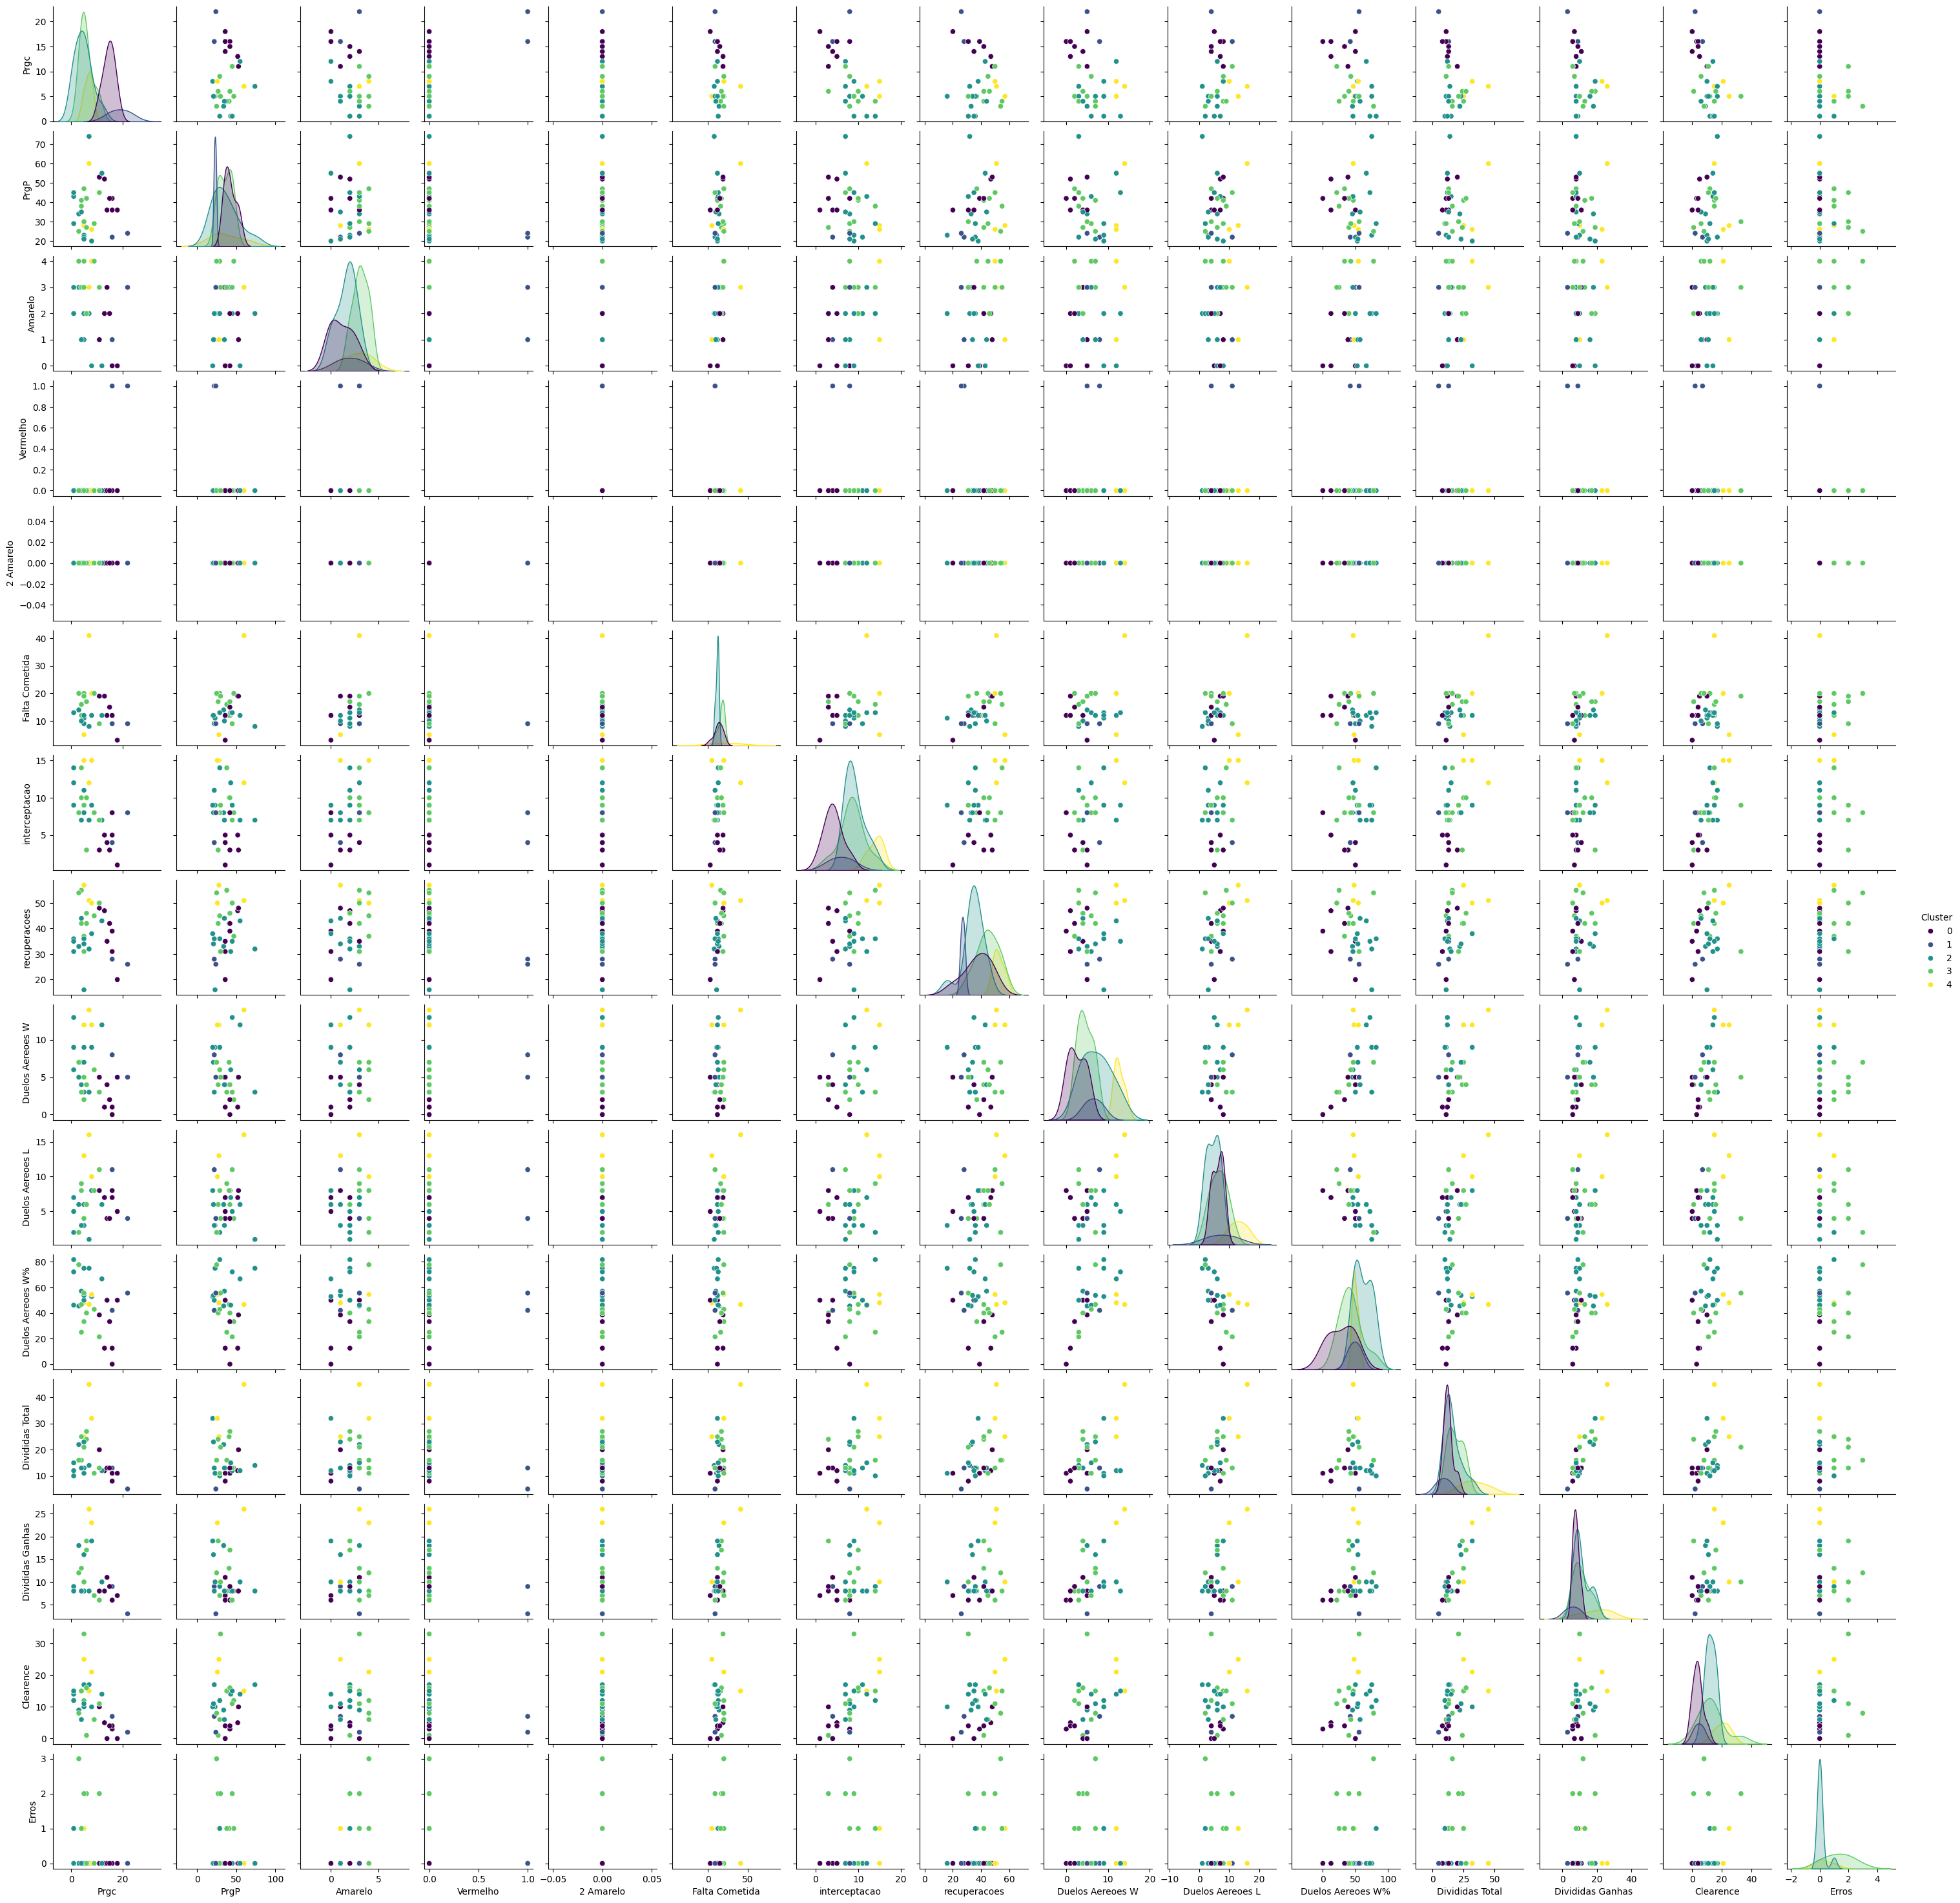

In [22]:
# Adicionar as métricas e o cluster ao DataFrame para visualização
metrics = ['Prgc','PrgP','Amarelo','Vermelho','2 Amarelo','Falta Cometida','interceptacao','recuperacoes','Duelos Aereoes W','Duelos Aereoes L','Duelos Aereoes W%', 'Divididas Total','Divididas Ganhas','Clearence','Erros','Cluster']

# Plotar o pair plot para todas as métricas
sns.pairplot(Vol[metrics], hue='Cluster', palette='viridis', diag_kind='kde', height=2)
plt.show()


### **Análise dos Gráficos e das Correlações no Heatmap**

A análise será feita com foco nos volantes, considerando as métricas apresentadas no heatmap e os padrões observados nos gráficos de dispersão.


## 📈 Correlações Fortes (r > 0.70)

- `Recuperações` & `Interceptações`: **0.84**  
  → Volantes que interceptam bem também são ótimos em recuperar a posse.

- `Divididas` & `Interceptações`: **0.77**  
  → Jogadores fortes no combate direto também contribuem com leitura de jogo.

- `PrgP` & `PrgC`: **0.72**  
  → Quem conduz bem a bola também tende a distribuir com passes progressivos.

---

## ⚖️ Correlações Moderadas (0.50 ≤ r < 0.70)

- `Recuperações` & `Clearances`: **0.66**  
  → Volantes defensivos também afastam o perigo com frequência.

- `Faltas` & `Interceptações`: **0.59**  
  → Maior envolvimento defensivo pode levar a mais faltas cometidas.

- `PrgP` & `Faltas (negativa)`: **-0.53**  
  → Volantes mais técnicos e de passe tendem a cometer menos faltas.

---

## 🚫 Correlações Negativas Relevantes

- `Clearances` & `PrgP`: **-0.66**  
  → Quem limpa a bola da defesa geralmente participa pouco da construção ofensiva.

- `Divididas` & `PrgP`: **-0.61**  
  → Volantes com mais combatividade direta não são os principais construtores.

- `Faltas` & `PrgC`: **-0.57**  
  → Jogadores com mais faltas têm menor capacidade de condução ofensiva.

---
### 🟩 Cluster 0 (Verde)  
🎯 **Volantes equilibrados e versáteis**  
- Valores **moderados** em quase todos os indicadores  
- Boa média de **passes progressivos** (`PrgP`) e **conduções progressivas** (`PrgC`)  
- Participam defensivamente com **recuperações** e **interceptações**, sem se destacar excessivamente  

⚖️ *Perfil de jogadores "box-to-box"*, que transitam bem entre defesa e ataque. Têm presença constante nas duas fases do jogo, com regularidade em métricas de combate e distribuição.

---

### 🟡 Cluster 1 (Amarelo)  
🛑 **Volantes de contenção / destrutores**  
- Altos valores de **interceptações**, **divididas**, **recuperações** e **clearances**  
- Baixíssima participação em ações ofensivas e progressivas (`PrgP` e `PrgC`)  
- Maior número de **faltas cometidas**

🧱 *Perfil de "cães de guarda"*, focados em **marcação e proteção da zaga**. Podem apresentar mais faltas e erros por atuarem em áreas de maior pressão.

---

### 🔵 Cluster 2 (Azul)  
📉 **Baixa participação / pouca minutagem**  
- Baixos valores em praticamente todas as métricas  
- Presença reduzida em ações defensivas e ofensivas  
- Provável participação limitada ao longo do campeonato

👥 *Perfil de reservas ou jogadores com poucos minutos em campo.* Requer cuidado na análise comparativa com titulares.

---

### 🟣 Cluster 3 (Roxo)  
🎨 **Volantes construtores / armadores recuados**  
- Altíssima média de **passes progressivos** e **conduções progressivas**  
- Menor envolvimento em ações de defesa: poucos desarmes, interceptações e clearances  
- Baixo número de faltas cometidas

🔧 *Perfil de "registas"*, responsáveis por **iniciar a construção das jogadas desde o campo defensivo**. Excelentes para times que valorizam a posse e a saída de bola curta.

---

### 🟠 Cluster 4 (Laranja)  
🚧 **Volantes combativos com alto volume de jogo**  
- Altos valores em quase todas as métricas defensivas: **desarmes, interceptações, recuperações**  
- Também aparecem com bons valores de **condução progressiva** (`PrgC`)  
- Cometem muitas faltas, mas são ativos em todo o campo

🔥 *Perfil de jogadores intensos e agressivos*, que combinam **volume defensivo** com alguma capacidade de transição. São volantes de alta rotação, geralmente com grande área de atuação.

---

In [29]:
cluster_names = {
    0: 'volante box',
    1: 'volante marcacao',
    2: 'volante sr',
    3: 'volante armador',
    4: 'volante defensivo',
}

# Adicionar nomes ao DataFrame
Vol['Perfil'] = Vol['Cluster'].map(cluster_names)

# Exibir os primeiros jogadores com seus perfis
print(Vol[['jogador','time','posicao','idade', 'Minutos', 'Prgc','PrgP','Amarelo','Vermelho','2 Amarelo','Falta Cometida','interceptacao','recuperacoes','Duelos Aereoes W','Duelos Aereoes L','Duelos Aereoes W%', 'Divididas Total','Divididas Ganhas','Clearence','Erros','Perfil']].head())

           jogador           time posicao   idade  Minutos  Prgc  PrgP  Amarelo  Vermelho  2 Amarelo  Falta Cometida  interceptacao  recuperacoes  Duelos Aereoes W  Duelos Aereoes L  Duelos Aereoes W%  Divididas Total  Divididas Ganhas  Clearence  Erros             Perfil
26  Caio Alexandre          Bahia      MF  26-101      651     5    47        4         0          0              20              8            37                 2                 4               33.3               13                 8         12      1    volante armador
36      Jean Lucas          Bahia      MF  26-348      622    16    22        1         1          0               9              4            28                 8                11               42.1               13                 9          7      0   volante marcacao
62         Gregore  Botafogo (RJ)      MF  31-095      863     7    60        3         0          0              41             12            51                14                16

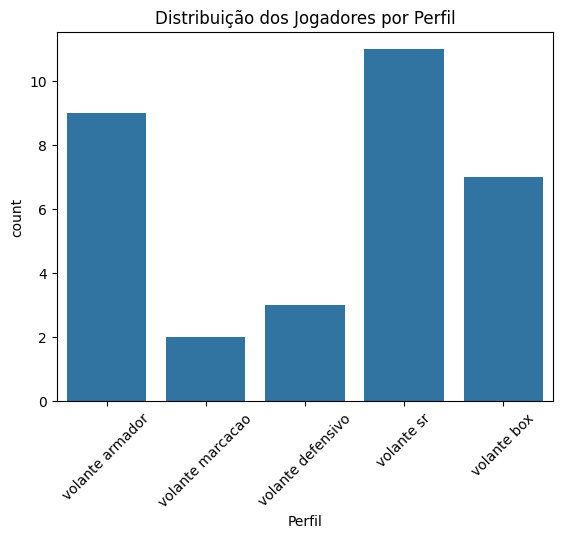

In [30]:
sns.countplot(data=Vol, x='Perfil')
plt.xticks(rotation=45)
plt.title('Distribuição dos Jogadores por Perfil')
plt.show()


In [31]:
# Função para exibir jogadores de um perfil específico
def exibir_jogadores_por_perfil(perfil_escolhido):
    # Filtrar os jogadores pelo perfil escolhido
    jogadores_filtrados = Vol[Vol['Perfil'] == perfil_escolhido]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado para o perfil: {perfil_escolhido}")
    else:
        print(f"\nJogadores no perfil: {perfil_escolhido}")
        print(jogadores_filtrados[['jogador','time','posicao','idade', 'Minutos', 'Prgc','PrgP','Amarelo','Vermelho','2 Amarelo','Falta Cometida','interceptacao','recuperacoes','Duelos Aereoes W','Duelos Aereoes L','Duelos Aereoes W%', 'Divididas Total','Divididas Ganhas','Clearence','Erros','Perfil']])

# Exemplo: Exibir jogadores do perfil "Apoiadores Ofensivos"
# Definir a largura máxima e o número de colunas exibidas
pd.set_option('display.max_columns', None)  # Exibir todas as colunas
pd.set_option('display.width', 1000)        # Aumentar a largura da tabela
perfil_escolhido = "volante box"  # Altere conforme necessário
exibir_jogadores_por_perfil(perfil_escolhido)



Jogadores no perfil: volante box
                    jogador          time posicao   idade  Minutos  Prgc  PrgP  Amarelo  Vermelho  2 Amarelo  Falta Cometida  interceptacao  recuperacoes  Duelos Aereoes W  Duelos Aereoes L  Duelos Aereoes W%  Divididas Total  Divididas Ganhas  Clearence  Erros       Perfil
105          André Carrillo   Corinthians      MF  33-356      611    16    42        0         0          0              12              8            39                 0                 8                0.0               11                 6          3      0  volante box
107                   Breno   Corinthians      MF  20-105      742    13    52        2         0          0              19              5            47                 1                 7               12.5               12                 8          5      0  volante box
148             Lucas Silva      Cruzeiro      MF  32-109      795    11    53        1         0          0              19              3  

In [32]:
# Dicionário dos peso para cada métrica
pesos = {
    'Amarelo': -5,
    'Vermelho': -10,
    'Falta Cometida' : -2,
    'interceptacao': 2,
    'recuperacoes': 2,
    'Duelos Aereoes W': 4,
    'Divididas Ganhas': 6,
    'Clearence': 5,
    'Erros' : 1,

}

# Função para normalizar uma métrica com base no valor máximo
def normalizar(coluna):
    return coluna / coluna.max()

# Calculando as pontuações individuais para cada métrica
for coluna, peso in pesos.items():
    Vol[coluna + '_Pontuacao'] = Vol[coluna] * peso

# Calculando a pontuação total
colunas_pontuacao = [coluna + '_Pontuacao' for coluna in pesos.keys()]
Vol['Pontuacao_Total'] = Vol[colunas_pontuacao].sum(axis=1)

# **Normalizando a pontuação total para o intervalo [0, 100]**
min_pontuacao = Vol['Pontuacao_Total'].min()
max_pontuacao = Vol['Pontuacao_Total'].max()
Vol['Pontuacao'] = (
    (Vol['Pontuacao_Total'] - min_pontuacao) / (max_pontuacao - min_pontuacao)
) * 100

# Filtrando os jogadores por perfil desejado e ordenando pelo total normalizado
perfil_escolhido = 'volante armador'
jogadores_filtrados = Vol[Vol['Perfil'] == perfil_escolhido]
jogadores_ordenados = jogadores_filtrados.sort_values(by='Pontuacao', ascending=False)

# Adicionando uma coluna de ranking
jogadores_ordenados['Ranking'] = range(1, len(jogadores_ordenados) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = jogadores_ordenados[['Ranking','time','posicao', 'jogador', 'Perfil', 'Pontuacao']]

# Imprimindo o resultado final no console
print("\nRanking de jogadores no perfil:", perfil_escolhido)
print(resultado_final.to_string(index=False))


Ranking de jogadores no perfil: volante armador
 Ranking          time posicao          jogador          Perfil  Pontuacao
       1 Vasco da Gama      MF       Hugo Moura volante armador  69.310345
       2 RB Bragantino      MF          Gabriel volante armador  66.551724
       3      Cruzeiro      MF     Lucas Romero volante armador       60.0
       4     Juventude      MF           Jadson volante armador  53.103448
       5  Sport Recife      MF Christian Rivera volante armador  46.206897
       6     São Paulo      MF          Alisson volante armador  38.965517
       7         Ceará      MF      Lucas Mugni volante armador  37.931034
       8         Bahia      MF   Caio Alexandre volante armador  25.517241
       9     Palmeiras      MF     Richard Ríos volante armador  23.793103


In [33]:
# Filtrando os jogadores pelo perfil escolhido
perfil_escolhido = 'volante defensivo'  # Defina o perfil desejado
jogadores_filtrados = Vol[Vol['Perfil'] == perfil_escolhido].copy()

# Lista com os nomes dos jogadores disponíveis
jogadores_disponiveis = jogadores_filtrados['jogador'].tolist()

# Dicionário para armazenar os valores de mercado inseridos
valores_mercado = {}

# Loop para inserir manualmente os jogadores e seus valores
print(f"Jogadores disponíveis no perfil '{perfil_escolhido}': {jogadores_disponiveis}")

while jogadores_disponiveis:
    # Input para selecionar o jogador
    jogador_escolhido = input("Digite o nome do jogador (ou 'sair' para finalizar): ")

    # Verifica se o nome inserido é válido ou finaliza o processo
    if jogador_escolhido.lower() == 'sair':
        break
    elif jogador_escolhido not in jogadores_disponiveis:
        print("Jogador não encontrado. Tente novamente.")
        continue

    # Input para inserir o valor de mercado
    while True:
        try:
            valor = float(input(f"Insira o valor de mercado para {jogador_escolhido} (€M): "))
            valores_mercado[jogador_escolhido] = valor  # Armazena o valor inserido
            jogadores_disponiveis.remove(jogador_escolhido)  # Remove da lista de disponíveis
            break
        except ValueError:
            print("Valor inválido. Por favor, insira um número válido.")

# Adicionando os valores de mercado ao DataFrame
jogadores_filtrados['Valor de Mercado (€M)'] = jogadores_filtrados['jogador'].map(valores_mercado)

# Calculando o custo por ponto
jogadores_filtrados['Custo por Ponto (€M)'] = (
    jogadores_filtrados['Valor de Mercado (€M)'] / jogadores_filtrados['Pontuacao']
)

# Calculando o Score de valor
jogadores_filtrados['Score de Valor'] = (
    jogadores_filtrados['Pontuacao'] / jogadores_filtrados['Valor de Mercado (€M)']
)

# Ordenando pelo maior Score de valor
resultado_final = jogadores_filtrados.sort_values(by='Score de Valor', ascending=False)

# Adicionando a coluna de ranking
resultado_final['Ranking'] = range(1, len(resultado_final) + 1)

# Selecionando as colunas desejadas para exibição
resultado_final = resultado_final[
    ['Ranking', 'jogador', 'Valor de Mercado (€M)', 'Pontuacao', 'Custo por Ponto (€M)', 'Score de Valor']
]

# Exibindo o resultado final
print("\nRanking de jogadores por eficiência de valor:")
print(resultado_final.to_string(index=False))
6

Jogadores disponíveis no perfil 'volante defensivo': ['Gregore', 'Dieguinho', 'Mathías Villasanti']
Digite o nome do jogador (ou 'sair' para finalizar): sair

Ranking de jogadores por eficiência de valor:
 Ranking            jogador  Valor de Mercado (€M)  Pontuacao  Custo por Ponto (€M)  Score de Valor
       1            Gregore                    NaN  83.793103                  <NA>            <NA>
       2          Dieguinho                    NaN      100.0                  <NA>            <NA>
       3 Mathías Villasanti                    NaN  99.310345                  <NA>            <NA>


6


Jogadores selecionados: Caio Alexandre, Gregore, Dieguinho, Mathías Villasanti, Hugo Moura
                jogador           time posicao   idade  Minutos  Prgc  PrgP  Amarelo  Vermelho  2 Amarelo  Falta Cometida  interceptacao  recuperacoes  Duelos Aereoes W  Duelos Aereoes L  Duelos Aereoes W%  Divididas Total  Divididas Ganhas  Clearence  Erros
26       Caio Alexandre          Bahia      MF  26-101      651     5    47        4         0          0              20              8            37                 2                 4               33.3               13                 8         12      1
62              Gregore  Botafogo (RJ)      MF  31-095      863     7    60        3         0          0              41             12            51                14                16               46.7               45                26         15      0
83            Dieguinho          Ceará      MF  29-217      967     5    28        1         0          0               5          

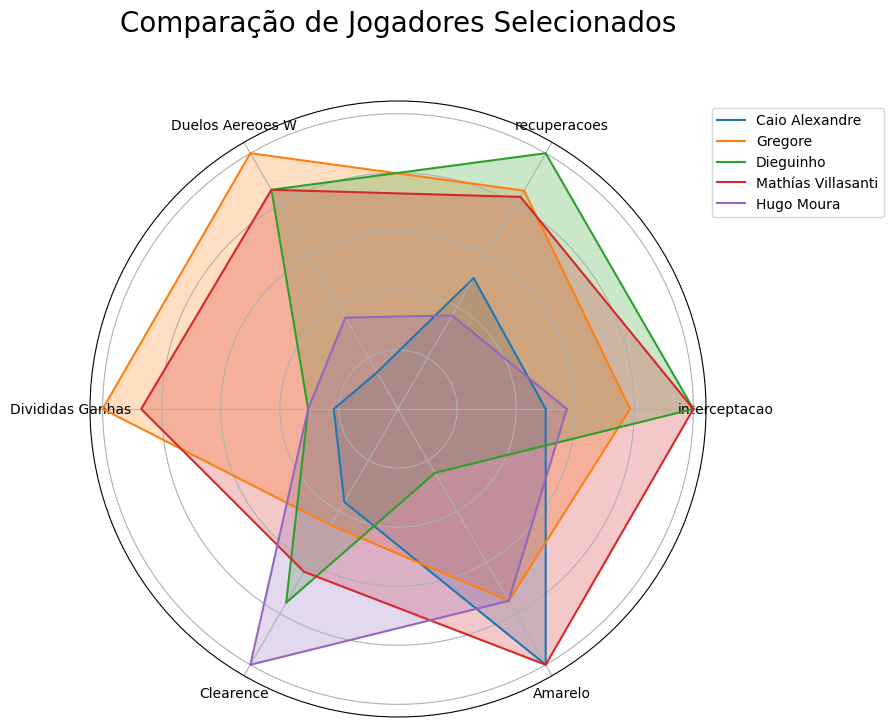

In [35]:
def radar_chart_por_jogadores(jogadores_selecionados, df):
    # Filtrar os jogadores pelos nomes inseridos
    jogadores_filtrados = df[df['jogador'].isin(jogadores_selecionados)]

    if jogadores_filtrados.empty:
        print(f"Nenhum jogador encontrado nos nomes fornecidos: {jogadores_selecionados}")
        return

    print(f"\nJogadores selecionados: {', '.join(jogadores_filtrados['jogador'])}")
    print(jogadores_filtrados[['jogador','time','posicao','idade', 'Minutos', 'Prgc','PrgP','Amarelo','Vermelho','2 Amarelo','Falta Cometida','interceptacao','recuperacoes','Duelos Aereoes W','Duelos Aereoes L','Duelos Aereoes W%', 'Divididas Total','Divididas Ganhas','Clearence','Erros',]])

    # Definir as métricas a serem exibidas no radar
    metricas = ['interceptacao','recuperacoes','Duelos Aereoes W','Divididas Ganhas','Clearence','Amarelo']
    num_vars = len(metricas)

    # Normalizar as métricas para todas ficarem na escala [0, 1]
    jogadores_normalizados = jogadores_filtrados.copy()
    for metrica in metricas:
        min_val = df[metrica].min()
        max_val = df[metrica].max()
        jogadores_normalizados[metrica] = (jogadores_filtrados[metrica] - min_val) / (max_val - min_val)

    # Ângulos para o gráfico radar
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Fechar o círculo

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Loop pelos jogadores selecionados
    for i, row in jogadores_normalizados.iterrows():
        valores = row[metricas].tolist()
        valores += valores[:1]  # Fechar o círculo

        # Plotar a linha e o preenchimento para o jogador
        ax.plot(angles, valores, label=row['jogador'])
        ax.fill(angles, valores, alpha=0.25)

    # Configurações do gráfico
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metricas)

    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
    plt.title('Comparação de Jogadores Selecionados', size=20, color='black', y=1.1)
    plt.show()

# Exemplo de uso: Insira os nomes dos jogadores que deseja comparar
jogadores_selecionados = ['Gregore','Mathías Villasanti','Dieguinho','Caio Alexandre','Hugo Moura']  # Altere conforme necessário
radar_chart_por_jogadores(jogadores_selecionados, Vol)